In [ ]:
import tensorflow as tf
import numpy as np


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import pickle
print(tf.__version__)

2.4.0


In [ ]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-_6q8ip7c
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-_6q8ip7c
     |████████████████████████████████| 1.0MB 8.9MB/s 
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.03fae058103384d0324a0b8b1462effe4886405e0_-cp36-none-any.whl size=146355 sha256=1c0b3a40091acaa694677b56b53222210897a5d4c83a128e171ba4d03cc89b1f
  Stored in directory: /tmp/pip-ephem-wheel-cache-jrrw5est/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4


In [ ]:
import pandas as pd
dataset=pd.read_csv("data.csv")
dataset

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green
...,...,...,...,...
5053,26,26,26,Black
5054,27,27,27,Black
5055,28,28,28,Black
5056,29,29,29,Black


In [ ]:
dataset=pd.get_dummies(dataset,columns=['label'])
dataset.head()

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,0,1,0,0,0,0,0,0,0,0,0
1,174,83,72,0,0,1,0,0,0,0,0,0,0,0
2,144,249,131,0,0,0,1,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,0,1,0,0,0,0
4,30,182,136,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
train_data=dataset.sample(frac=0.8,random_state=8)
test_data=dataset.drop(train_data.index)
train_data

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
596,134,0,144,0,0,0,0,0,0,1,0,0,0,0
3568,118,83,192,0,0,0,0,0,0,0,1,0,0,0
928,3,128,220,0,1,0,0,0,0,0,0,0,0,0
3170,40,200,85,0,0,0,1,0,0,0,0,0,0,0
1534,203,34,242,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,103,24,212,0,1,0,0,0,0,0,0,0,0,0
744,0,253,115,0,0,0,1,0,0,0,0,0,0,0
1268,172,65,159,0,0,0,0,0,0,0,1,0,0,0
2567,219,183,137,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
test_data

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
5,199,150,175,0,0,0,0,0,0,1,0,0,0,0
11,198,196,0,0,0,0,1,0,0,0,0,0,0,0
13,214,196,0,0,0,0,0,0,0,0,0,0,0,1
17,249,99,108,0,0,0,0,0,0,1,0,0,0,0
21,10,155,98,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,13,13,13,1,0,0,0,0,0,0,0,0,0,0
5048,21,21,21,1,0,0,0,0,0,0,0,0,0,0
5052,25,25,25,1,0,0,0,0,0,0,0,0,0,0
5053,26,26,26,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_labels = pd.DataFrame([train_data.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
train_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
596,0,0,0,0,0,1,0,0,0,0,0
3568,0,0,0,0,0,0,1,0,0,0,0
928,0,0,1,0,0,0,0,0,0,0,0
3170,0,1,0,0,0,0,0,0,0,0,0
1534,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2265,0,0,1,0,0,0,0,0,0,0,0
744,0,1,0,0,0,0,0,0,0,0,0
1268,0,0,0,0,0,0,1,0,0,0,0
2567,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
test_labels=pd.DataFrame([test_data.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
test_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
5,0,0,0,0,0,1,0,0,0,0,0
11,0,1,0,0,0,0,0,0,0,0,0
13,0,0,0,1,0,0,0,0,0,0,0
17,0,0,0,0,0,1,0,0,0,0,0
21,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5040,0,0,0,0,0,0,0,0,0,1,0
5048,0,0,0,0,0,0,0,0,0,1,0
5052,0,0,0,0,0,0,0,0,0,1,0
5053,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
test_data

,red,green,blue
5,199,150,175
11,198,196,0
13,214,196,0
17,249,99,108
21,10,155,98
...,...,...,...
5040,13,13,13
5048,21,21,21
5052,25,25,25
5053,26,26,26


In [ ]:
from keras import regularizers
model=keras.Sequential([
    layers.Dense(22,kernel_regularizer=regularizers.l2(0.002),activation='relu',input_shape=[len(train_data.keys())]),
    layers.Dense(22,kernel_regularizer=regularizers.l2(0.002),activation='relu'),
    layers.Dense(11)
])
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 22)                88        
_________________________________________________________________
dense_1 (Dense)              (None, 22)                506       
_________________________________________________________________
dense_2 (Dense)              (None, 11)                253       
Total params: 847
Trainable params: 847
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
np.shape(train_data)

(4046, 3)

In [ ]:
history = model.fit(x=train_data, y=train_labels, 
                    validation_split=0.2, 
                    epochs=5001, 
                    batch_size=2048, 
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()], 
                    shuffle=True)


Epoch: 0, accuracy:0.1119,  loss:46.7444,  val_accuracy:0.1321,  val_loss:43.7602,  
....................................................................................................
Epoch: 100, accuracy:0.7256,  loss:0.7339,  val_accuracy:0.7259,  val_loss:0.7689,  
....................................................................................................
Epoch: 200, accuracy:0.7738,  loss:0.5814,  val_accuracy:0.7531,  val_loss:0.6076,  
....................................................................................................
Epoch: 300, accuracy:0.7942,  loss:0.5367,  val_accuracy:0.7827,  val_loss:0.5519,  
....................................................................................................
Epoch: 400, accuracy:0.8087,  loss:0.5050,  val_accuracy:0.8062,  val_loss:0.5164,  
....................................................................................................
Epoch: 500, accuracy:0.8189,  loss:0.4811,  val_accuracy:0.8173,  val

Text(0, 0.5, 'accuracy [Color]')

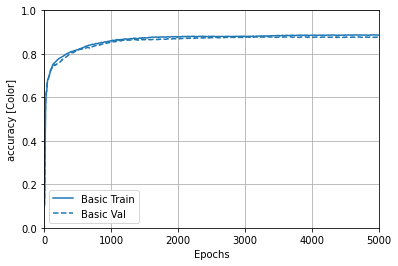

In [ ]:
import matplotlib.pyplot as plt
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'loss [Color]')

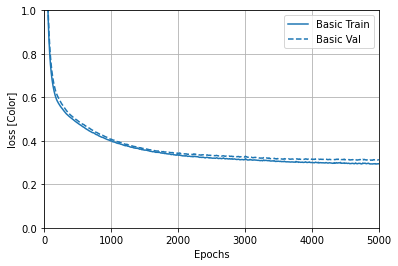

In [ ]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

In [ ]:
confi_predict_labels=model.predict(test_data)
predict_labels=np.argmax(confi_predict_labels,axis=1)
predict_labels = pd.DataFrame(predict_labels, columns=['Predicted Labels'])
predict_labels

,Predicted Labels
0,6
1,3
2,3
3,0
4,1
...,...
1007,9
1008,9
1009,9
1010,9


In [ ]:
confi_predict_labels[1,:]

array([ -0.38433307,  28.478748  , -19.748735  ,  29.972092  ,
        17.861778  , -21.759907  , -25.169538  ,  15.461438  ,
         0.45810592, -38.72165   ,  -6.5387135 ], dtype=float32)

In [ ]:
actual_encoded_test_labels = np.argmax(test_labels.to_numpy(), axis=1) 
#Converting numpy array to pandas dataframe
actual_encoded_test_labels = pd.DataFrame(actual_encoded_test_labels, columns=['Actual Labels'])
actual_encoded_test_labels

,Actual Labels
0,5
1,1
2,3
3,5
4,1
...,...
1007,9
1008,9
1009,9
1010,9


In [ ]:
model.evaluate(x=test_data, y=test_labels)

32/32 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.8804


[0.3594205975532532, 0.8804348111152649]

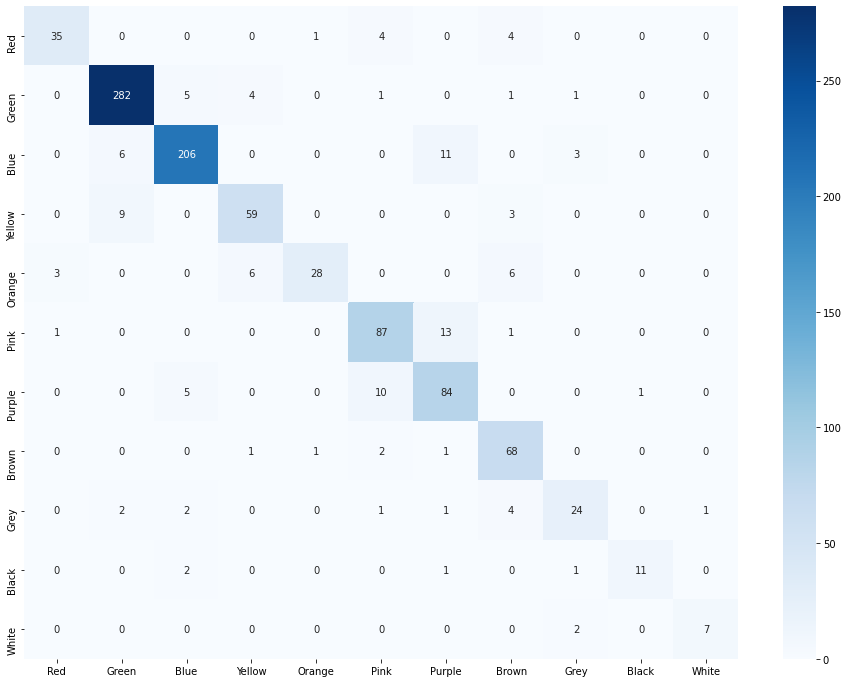

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_test = confusion_matrix(actual_encoded_test_labels, predict_labels)
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [ ]:
#Classification Report
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_test_labels, predict_labels, target_names=target_names))


              precision    recall  f1-score   support

         Red       0.90      0.80      0.84        44
       Green       0.94      0.96      0.95       294
        Blue       0.94      0.91      0.92       226
      Yellow       0.84      0.83      0.84        71
      Orange       0.93      0.65      0.77        43
        Pink       0.83      0.85      0.84       102
      Purple       0.76      0.84      0.80       100
       Brown       0.78      0.93      0.85        73
        Grey       0.77      0.69      0.73        35
       Black       0.92      0.73      0.81        15
       White       0.88      0.78      0.82         9

    accuracy                           0.88      1012
   macro avg       0.86      0.82      0.83      1012
weighted avg       0.88      0.88      0.88      1012



In [ ]:

!pip install pyyaml h5py  # Required to save models in HDF5 format

In [ ]:
# Save the entire model to an HDF5 file.
# The '.h5' extension indicates that the model is saved to HDF5.
model.save('colormodel_trained_90.h5') 
#Download trained model using Colab
from google.colab import files
files.download("colormodel_trained_90.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
filename = 'finalized_model.pkl'
import pickle
pickle.dump(model, open(filename, 'wb'))

AttributeError: ignored